In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
sim = HathorSimulator(block_weight=20.30)

m0 = Miner(hashpower=10000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=1/16., hashpower=10000)
sim.add_tx_generator(g1)

[        0.00] min weight updated: w_blk=22.8850 w_tx=  -inf


In [3]:
sim.run(3600*24, report_interval=3600)
print(len(sim.blocks), len(sim.transactions))

  0.02 [     3671.49] blocks=28 txs=243 tips=1
[     3676.55] min weight updated: w_blk=22.8850 w_tx=13.0866
  0.03 [     7339.91] blocks=63 txs=469 tips=0
[     7353.09] min weight updated: w_blk=22.8850 w_tx=12.9696
  0.04 [    10946.40] blocks=101 txs=693 tips=1
[    10963.93] min weight updated: w_blk=22.8850 w_tx=12.9957
  0.06 [    14562.75] blocks=122 txs=906 tips=1
[    14565.99] min weight updated: w_blk=22.8850 w_tx=12.9269
  0.07 [    18172.82] blocks=148 txs=1109 tips=1
[    18173.33] min weight updated: w_blk=22.8850 w_tx=12.8415
[    21773.50] min weight updated: w_blk=22.8850 w_tx=12.9935
  0.08 [    21773.50] blocks=177 txs=1334 tips=1
  0.09 [    25393.06] blocks=215 txs=1585 tips=0
[    25403.28] min weight updated: w_blk=22.8850 w_tx=13.1459
  0.11 [    28993.10] blocks=239 txs=1811 tips=1
[    29018.13] min weight updated: w_blk=22.8850 w_tx=13.0132
  0.12 [    32596.05] blocks=270 txs=2027 tips=1
[    32652.95] min weight updated: w_blk=22.8850 w_tx=12.9339
  0.14 

In [4]:
print(sim.min_weight_confirmed)

22.8865376124


In [5]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)

In [6]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

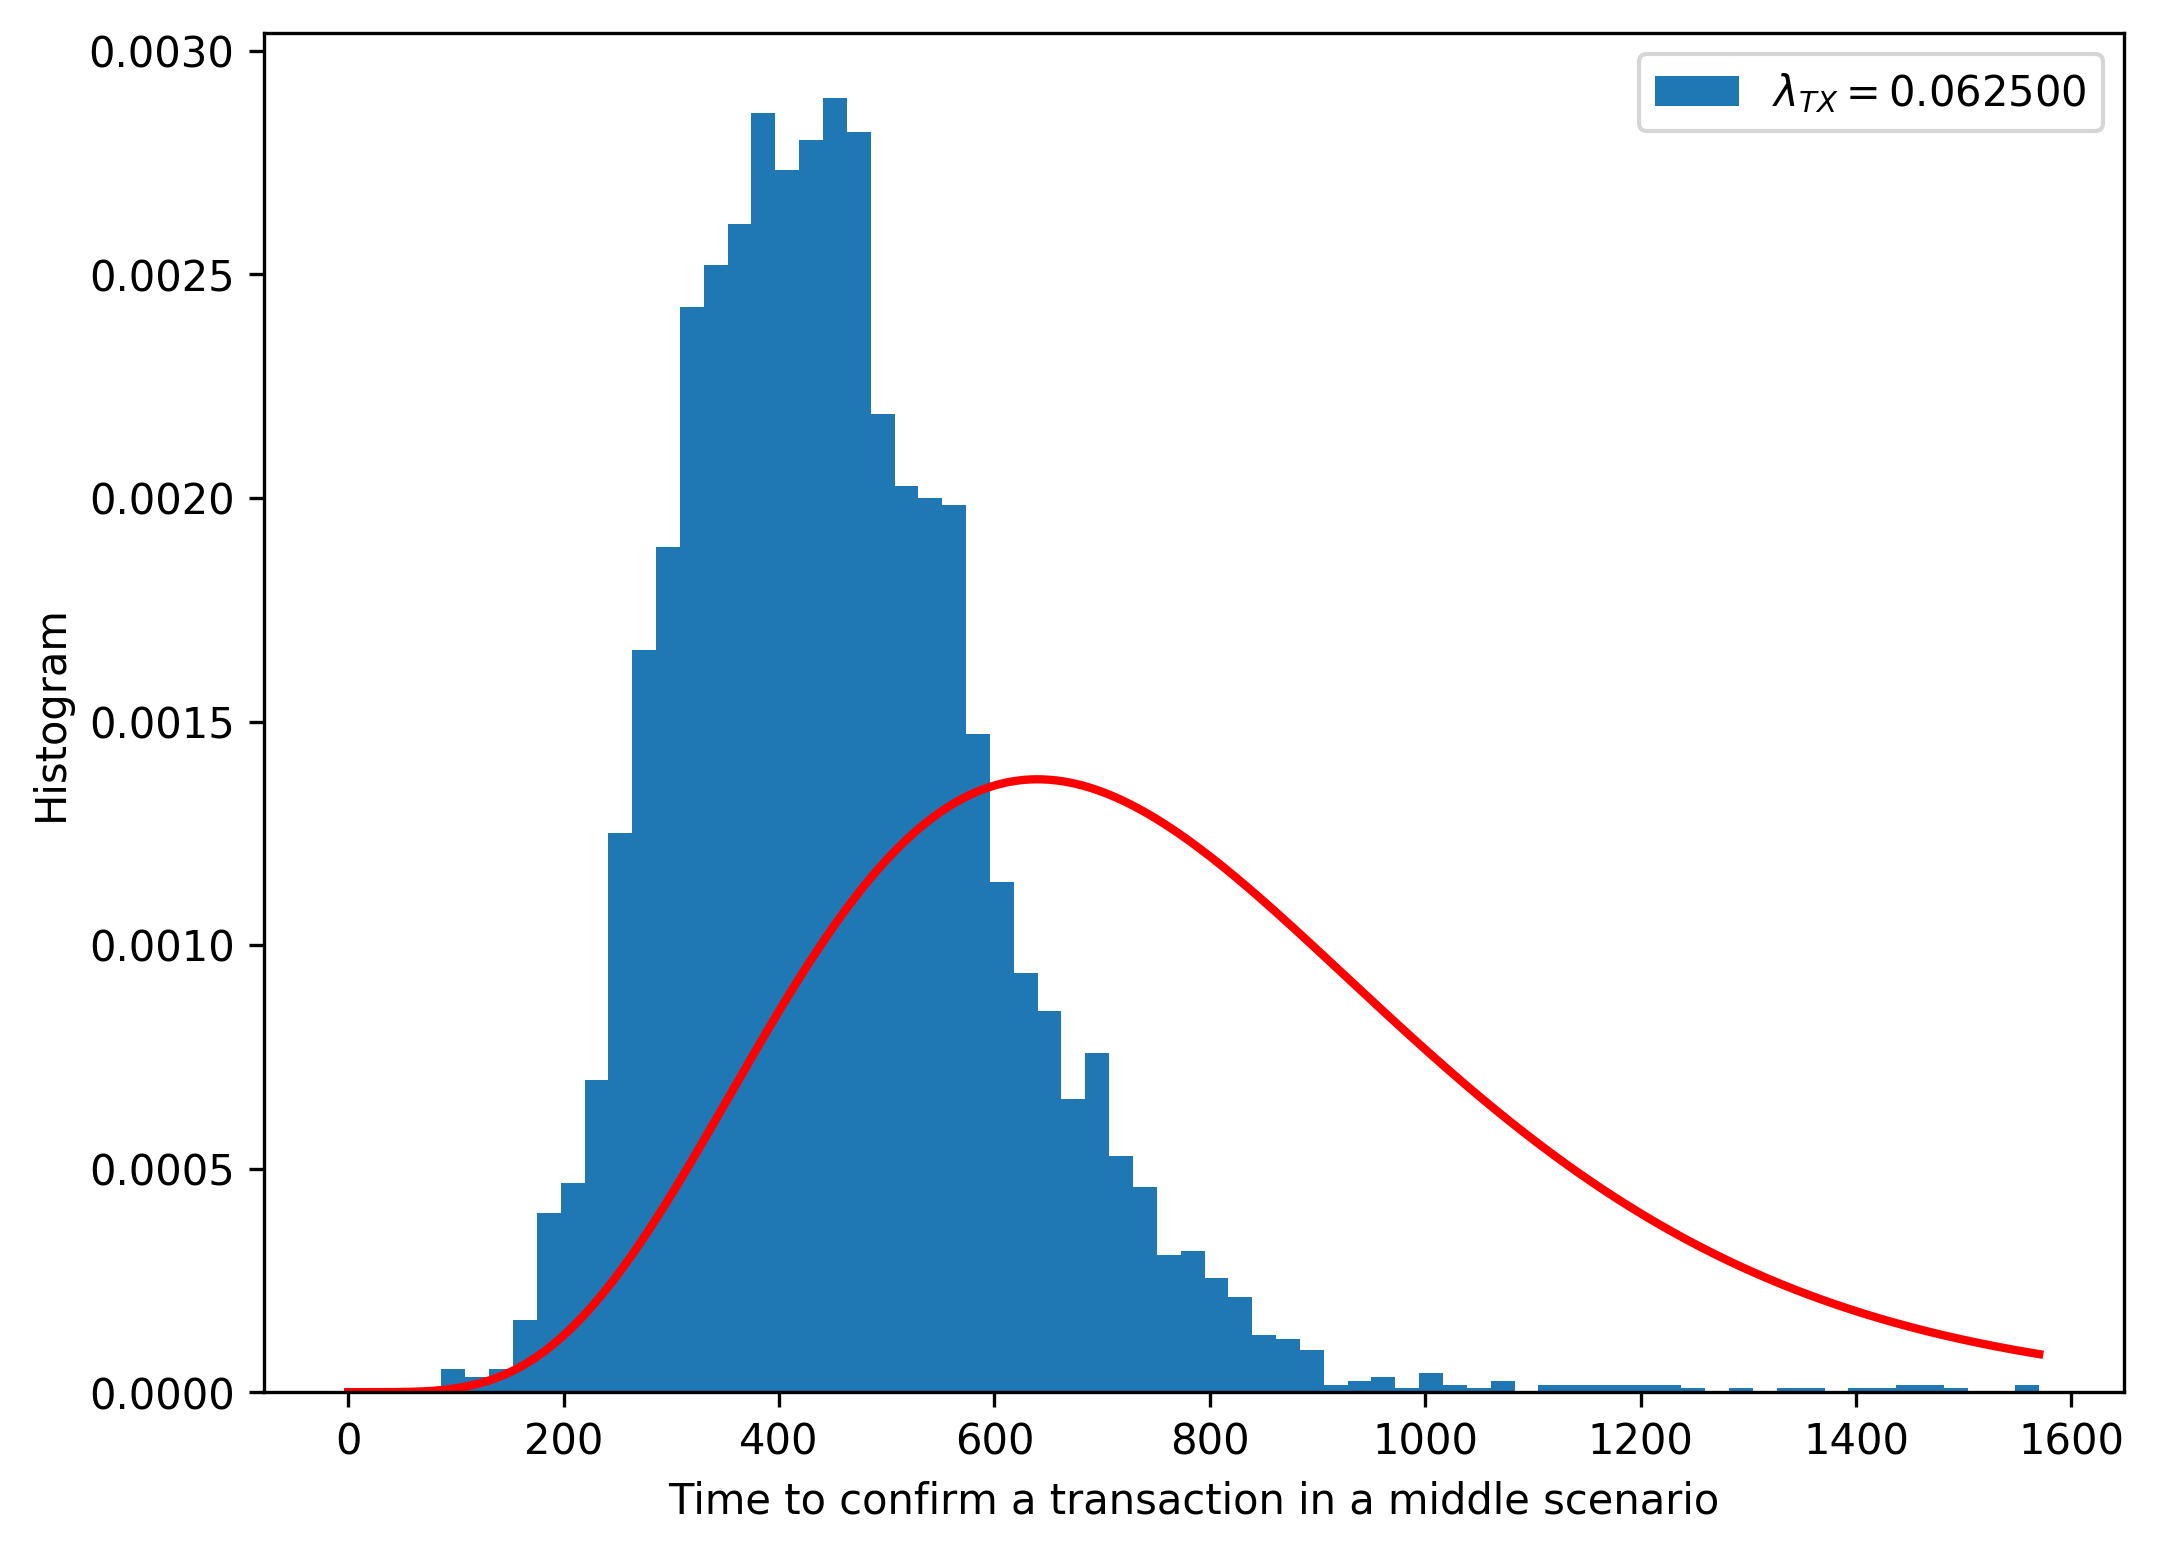

In [7]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd', density=True, label='$\lambda_{{TX}} = {:.6f}$'.format(g1.tx_lambda));

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction in a middle scenario');
plt.legend();

In [8]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

(20.3, 22.886537612384753)
('17', 'blk', 20.3, 23.10735492205761, 1028.9861)
('29', 'blk', 20.3, 23.10735492205761, 1157.8609000000001)
('35', 'blk', 20.3, 23.10735492205761, 1402.3282000000002)
('36', 'blk', 20.3, 23.10735492205761, 1382.3806)
('56', 'tx', 17, 22.90917141998669, 1176.4227323790642)
('57', 'blk', 20.3, 23.10735492205761, 1232.4436)
('348', 'blk', 20.3, 23.10735492205761, 1041.8867)
('353', 'blk', 20.3, 23.10735492205761, 1000.6842999999999)
('361', 'blk', 20.3, 23.10735492205761, 1243.1264)
('362', 'blk', 20.3, 23.10735492205761, 1383.4228000000003)
('364', 'blk', 20.3, 23.10735492205761, 1422.7066999999997)
('779', 'blk', 20.3, 23.10735492205761, 1011.0041000000019)
('791', 'blk', 20.3, 23.10735492205761, 1032.463700000002)
('795', 'blk', 20.3, 23.10735492205761, 1489.5319000000018)
('802', 'blk', 20.3, 23.10735492205761, 2034.1455000000024)
('819', 'blk', 20.3, 23.10735492205761, 1794.870600000002)
('852', 'tx', 17, 22.90917141998669, 1395.7835494444407)
('853', 'blk

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)